# Решение расчетно-графичкской работы №1 "Изучение парной регрессии"
### Студент: Кудрявцев Эдуард Сергеевич, M3335, 354409

In [1]:
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

from numpy import fabs, sqrt, arctanh, tanh

## Задание 1
В качестве dataset'а были взяты погодные показания в венгерском городе Сегеде начала 2006 года

Ссылка на источник: https://www.kaggle.com/datasets/budincsevity/szeged-weather

Объектом анализа была зависимость показателя "Ощущаемая температура" от реальной температуры

In [2]:
df = pandas.read_csv('data/weatherHistory.csv')
x_title = 'Temperature (C)'
y_title = 'Apparent Temperature (C)'
to_choose = df.head(300)
x_values = to_choose[x_title]
y_values = to_choose[y_title]

## Задание 2

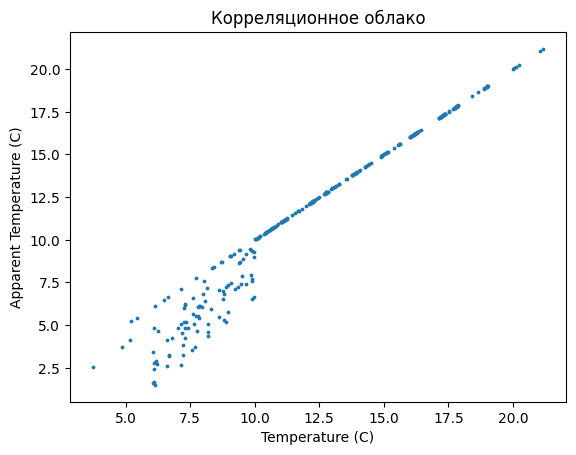

In [3]:
plt.scatter(x_values, y_values, s=3)
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title("Корреляционное облако")
plt.show()

По корреляционному облаку наблюдаем возможную очень сильную прямую линейную связь между показателями

## Задание 3

Для всех дальнейших вычислений возьмем уровень значимости как $\alpha=0,05$

### Нормальность температуры и ощутимой температуры проверяем с помощью теста Д'Агостино-Пирсона:

$H_0$: данные взяты из нормального распределения

$H_1$: данные взяты не из нормального распределения

$A_s = \frac{\frac{1}{n} \sum_{i=1}^{n}(X_i - \bar{X})^3}{\left(\frac{1}{n} \sum_{i=1}^{n}(X_i - \bar{X})^2\right)^{3/2}}$

$Y = A_s \sqrt{\frac{(n+1)(n+3)}{6(n-2)}}$

$\beta_2 = \frac{3(n^2 + 27n - 70)(n+1)(n+3)}{(n-2)(n+5)(n+7)(n+9)}$

$W^2 = \sqrt{2\beta_2 - 1} - 1$

$\delta = 1 / \sqrt{\ln W}$

$\alpha = \sqrt{2 / (W^2 - 1)}$

$Z_1 = \delta \cdot \ln\left( \frac{Y}{\alpha} + \sqrt{ \left( \frac{Y}{\alpha} \right)^2 + 1 } \right)$

$E_s = \frac{\frac{1}{n} \sum_{i=1}^{n}(X_i - \bar{X})^4}{\left(\frac{1}{n} \sum_{i=1}^{n}(X_i - \bar{X})^2\right)^2} - 3$

$E (E_s) = -\frac{6}{n+1}$

$D_{E_s} = \frac{24n(n-2)(n-3)}{(n+1)^2(n+3)(n+5)}$

$X = \frac{E_s - E(E_s)}{\sqrt{\text{Var}(E_s)}}$

$\beta_1 = \frac{6(n^2 - 5n + 2)}{(n+7)(n+9)} \sqrt{\frac{6(n+3)(n+5)}{n(n-2)(n-3)}}$

$A = 6 + \frac{8}{\beta_1} \left( \frac{2}{\beta_1} + \sqrt{1 + \frac{4}{\beta_1^2}} \right)$

$Z_2 = \frac{ \left(1 - \frac{2}{9A} \right) - \left( \frac{1 - 2/A}{1 + X \sqrt{2/(A-4)}} \right)^{1/3} }{ \sqrt{\frac{2}{9A}} }$

Статистика критерия: $\chi^2_н=Z_1^2+Z_2^2$ при верной нулевой гипотезе имеет распределение $\chi^2$ с двумя степенями свободы

Критическое значение для уровня значимости $\alpha$: $\chi^2_{кр}(\alpha, 2)$ - квантиль распределения $\chi^2$ с $2$ степенями свободы для уровня значимости $\alpha$.

В случае, если $\chi^2_н<\chi^2_{кр}$ гипотеза о нормальности данных не отвергается на данном уровне значимости. В противном случае она отвергается и констатируется обратное

### Далее посчитаем коэффициент корреляции Пирсона:

$r_{x, y}=\dfrac{1/n*\sum(y_i-y_{avg})(x_i-x_{avg})}{\sqrt{1/n*\sum(x_i-x_{avg})^2}*\sqrt{1/n*\sum(y_i-y_{avg})^2}}$

### Значимость коэффициента проверяется с помощью критерия Стьюдента:

$H_0: r_{x, y}=0$ коэффициент статистически незначим

$H_1: r_{x, y} \neq 0$ коэффициент статистически значим

Статистика: $t_н = \dfrac{|r|*\sqrt{n-2}}{\sqrt{1-r^2}}$ При верной нулевой гипотезе имеет распределение Стьюдента с n-2 степенями свободы.

Критическое значение для уровня значимости $\alpha$: $t_{кр}(\alpha, n-2)$ - квантиль распределения стьюдента с $n-2$ степенями свободы для уровня значимости $\alpha$.

В случае, если $|t_н|<|t_{кр}|$ гипотеза о статистической незначимости коэффициента корреляции не отвергается на данном уровне значимости. В противном случае она отвергается и констатируется статистическая значимость коэффициента корреляции Пирсона

### Доверительный интервал для него будет вычисляться с помощью Z-преобразования Фишера

$th( arcth(\hat{r}) - \dfrac{u_{\gamma}}{\sqrt{n-3}} ) < r_{x, y} < th( arcth(\hat{r}) + \dfrac{u_{\gamma}}{\sqrt{n-3}} )$, где $u_{\gamma}$ - квантиль стандартного нормального распределения уровня $1-\dfrac{\alpha}{2}$

In [4]:
p_value = 0.05  # Уровень значимости

# Проверка нормальности
print(f"Нормальность X: {stats.normaltest(x_values).pvalue < p_value}")
print(f"Нормальность Y: {stats.normaltest(y_values).pvalue < p_value}")

# Коэффициент корреляции Пирсона, его значимость и доверительный интервал
coeff_pearson = stats.pearsonr(x_values, y_values, alternative='two-sided')
print()
print(f"Коэффициент корреляции Пирсона: {coeff_pearson.statistic:.3f}")
print(f"Значимость коэффициента корреляции Пирсона:")
observed = fabs(coeff_pearson.statistic) * sqrt(len(to_choose) - 2) / sqrt(1 - (coeff_pearson.statistic ** 2))
print(f"    Наблюдаемая статистика (модуль): {observed:.3f}")
critical = fabs(stats.t.ppf(p_value, len(to_choose) - 2))
print(f"    Критическая статистика (модуль): {critical:.3f}")
print(f"    Значимость?: {observed > critical}")
z_value = arctanh(coeff_pearson.statistic)
deviation = stats.norm.ppf(1 - p_value / 2) / np.sqrt(len(to_choose) - 3)
print(f"Доверительный интервал: ({tanh(z_value - deviation):.3f}, {tanh(z_value + deviation):.3f})")
print()

Нормальность X: True
Нормальность Y: True

Коэффициент корреляции Пирсона: 0.981
Значимость коэффициента корреляции Пирсона:
    Наблюдаемая статистика (модуль): 86.558
    Критическая статистика (модуль): 1.650
    Значимость?: True
Доверительный интервал: (0.976, 0.985)



## Задание 4

### Вычисление коэффициентов линейной регрессии

$X^T=X^T (Y-X \theta) = 0$

$X^T X \theta = X^T Y$

$\theta = (X^T X)^{-1} X^T Y$

### Коэффициент детерминации:

$R^2=1-\dfrac{\sum \epsilon_i^2}{n-2}$ - показывает, насколько хорошо модель описывает зависимость значений данных

### Значимость уравнения регрессии проверяется с помощью F-теста

$H_0: D_{факт}=D_{остат}$ Модель статистически незначима

$H_1: D_{факт} \neq D_{остат}$ Модель статистически значима

Статистика критерия: $F_н=\dfrac{D_{факт}}{D_{остат}}=\dfrac{RSS/m}{ESS/(n-m-1)}$, где m - количество факторов$(m=1)$. $RSS= \sum (\hat{y_i}-y_{avg})^2$ $ESS= \sum (y_i - \hat{y_i})^2$, при верной нулевой гипотезе имеет распределение Фишера-Снедекора со степенями свободы $m$ и $n-m-1$

Критическая статистика - квантиль распределения Фишера-Снедекора с вышеупомянутыми степенями свободы и с заданным уровнем значимости $\alpha$

В случае если $F_н < F_{кр}$, нулевая гипотеза не отвергается, а в противном случае отвергается и принимается альтернативная гипотеза о статистической значимости уравнения регрессии

### Значимость коэффициентов модели проверяется с помощью t-теста

$H_0: \theta_i=0$

$H_1: \theta_i \neq 0$

Статистика $t_н=\dfrac{\hat{\theta_i}}{S_{\theta_i}}$, где $S_{\theta_i}$ - стандартная ошибка коэффициента, $S_a = \dfrac{s * \sqrt{\sum x_i^2}}{\sqrt{n \sum (x_i - x_{avg})^2}}$, $S_b = \dfrac{s}{\sqrt{n \sum (x_i - x_{avg})^2}}$, $s^2=\dfrac{ \sum \epsilon_i^2 }{n - 2}$, при верной нулевой гипотезе имеет распределение Стьюдента с n-2 степенями свободы.

Расчет критического значения и проверка гипотез аналогичны оным при проверке значимости коэффициента корреляции Пирсона.

### Средняя ошибка аппроксимации

$A_{avg}=\dfrac{1}{n} \sum |\dfrac{y_i-\hat{y_i}}{y_i}|*100$%

Показывает, на сколько % в среднем модель ошибается в расчетах

### Средняя эластичность

$E_{avg} = b*\dfrac{x_{avg}}{y_{avg}}$

Показывает, на сколько % в среднем увеличивается $y$, если увеличить $x$ на 1%

In [5]:
x_for_regression = sm.add_constant(x_values)
model = sm.OLS(y_values, x_for_regression).fit()
a = model.params['const']
b = model.params[x_title]
print(f"Уравнение регрессии: y = {a:.3f} + {b:.3f}*x")
print(f"Коэффициент детерминации: {model.rsquared:.3f}")
print(f"F-статистика: {model.fvalue:.3f}")
f_critical = stats.f.ppf(p_value, model.df_model, model.df_resid)
print(f"F-критическая: {f_critical:.3f}")
print(f"Значимоть уравнения (F-тест): {model.fvalue > f_critical}")
print("t-статистики: ")
t_a = model.tvalues['const']
t_b = model.tvalues[x_title]
t_critical = stats.t.ppf(p_value, len(to_choose) - 2)
print(f"    a: {t_a:.3f}")
print(f"    b: {t_b:.3f}")
print(f"    Критическая: {t_critical:.3f}")
print("Значимость коэффициентов (t-тест)")
print(f"    a: {fabs(t_a) > fabs(t_critical)}")
print(f"    b: {fabs(t_b) > fabs(t_critical)}")
print(f"Средняя ошибка аппроксимации: {np.mean(np.abs(model.resid) / y_values) * 100:.3f}%")
print(f"Средняя эластичность: {np.mean(b * x_values / y_values):.3f}")

Уравнение регрессии: y = -2.911 + 1.187*x
Коэффициент детерминации: 0.962
F-статистика: 7492.271
F-критическая: 0.004
Значимоть уравнения (F-тест): True
t-статистики: 
    a: -16.569
    b: 86.558
    Критическая: -1.650
Значимость коэффициентов (t-тест)
    a: True
    b: True
Средняя ошибка аппроксимации: 11.786%
Средняя эластичность: 1.373


Коэффициент детерминации демонстрирует, что линейная модель описывает зависимость показателей довольно неплохо, а коэффициенты регрессии и эластичности говорят о том, что показания ощутимой температуры и температуры реальной оказались приблизительно сравнимыми, что вполне себе логично.

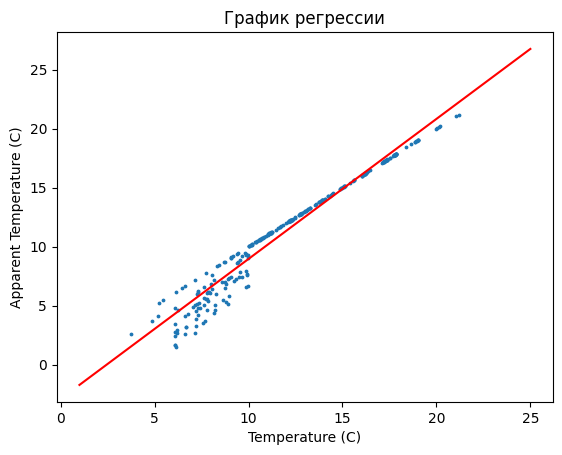

In [6]:
plt.scatter(x_values, y_values, s=3)
plt.xlabel(x_title)
plt.ylabel(y_title)
plt.title("График регрессии")
gr_x = np.linspace(1, 25, 400)
gr_y = a + b * gr_x
plt.plot(gr_x, gr_y, color='r')
plt.show()

## Задание 5:

### Условия Гаусса-Маркова:
1. $\sum \epsilon_i=0$ - Сумма остатков равна нулю
2. $cov(\epsilon_i, \epsilon_{i-1}) = 0$ - Отсутствие автокорреляции
3. $\sigma^2_{\epsilon} = const$ - Отсутствие гетероскедастичности
4. $\epsilon_i$ имеет нормальное распределение

### Отсутствие автокорреляции: тест Бройша-Годфри

$H_0:$ Не имеется автокорреляции порядка p

$H_1:$ Имеется автокорреляции порядка p

1. Строится первичная регрессия, находится ряд остатков
2. Строится вспомогательная регрессия $\epsilon_t = a_0 + a_1 x_t + \sum_1^p b_i \epsilon_{t-i}$
3. Статистика критерия: $\chi^2_н=nR^2$ при верной нулевой гипотезе имеет распределение $\chi^2$ с $p$ степенями свободы
4. Если $\chi^2_н>\chi^2_{кр}$, то нулевая гипотеза отвергается и имеется автокорреляция

### Отсутствие гетероскедастичности: тест Уайта

$H_0: \sigma_{\epsilon}=const$

$H_1: \sigma_{\epsilon} \neq const$

1. Строится первичная регрессия, находится ряд остатков
2. Строится регрессия $\epsilon_i^2$ на константу, $x_i$, $x_i^2$ $x_i*x_j$
3. Статистика критерия: $\chi^2_н=nR^2$ при верной нулевой гипотезе имеет распределение $\chi^2$ с $m-1$ степенями свободы, где $m$ - количество регрессоров во вторичной модели
4. Если $\chi^2_н>\chi^2_{кр}$, то нулевая гипотеза отвергается и имеется гетероскедастичность

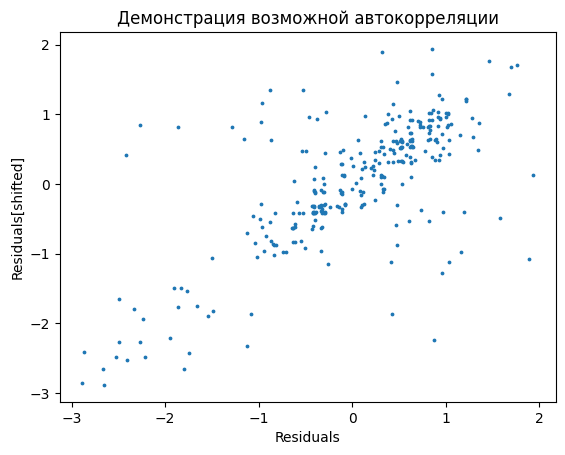

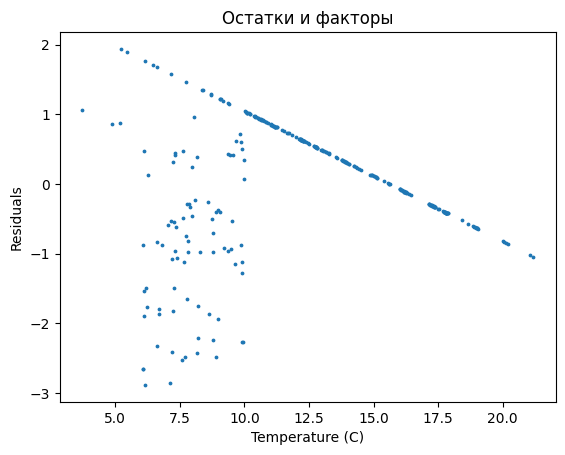

In [7]:
plt.scatter(model.resid[:-1], model.resid[1:], s=3)
plt.xlabel("Residuals")
plt.ylabel("Residuals[shifted]")
plt.title("Демонстрация возможной автокорреляции")
plt.show()
plt.scatter(x_values, model.resid, s=3)
plt.xlabel(x_title)
plt.ylabel("Residuals")
plt.title("Остатки и факторы")
plt.show()

In [8]:
print("Проверка условий Гаусса-Маркова")
print(f"    1. Cумма остатков =0: {sum(model.resid) < 10 ** -8}")
print(
    f"    2. Отсутствие автокорреляции (тест Бройша-Годфри): {sm.stats.diagnostic.acorr_breusch_godfrey(model)[1] > p_value}")
print(
    f"    3. Отсутствие гетероскедастичности (тест Уайта): {sm.stats.diagnostic.het_white(model.resid, model.model.exog)[1] > p_value}"
)
print(f"    4. Нормальность остатков: {stats.normaltest(model.resid).pvalue < p_value}")

Проверка условий Гаусса-Маркова
    1. Cумма остатков =0: True
    2. Отсутствие автокорреляции (тест Бройша-Годфри): False
    3. Отсутствие гетероскедастичности (тест Уайта): False
    4. Нормальность остатков: True


## Задание 6

Поскольку содержательный смысл переменных подсказывает о полной бессмысленности построения нелинейных моделей, а выполнять данное задание как-то необходимо, нелинейные модели были выбраны исходя из принципа "просто потому что" и для обеих с помощью j-теста Стьюдента были проверены гипотезы о возможности их замены на линейную. Как следствие, лучшая из них не выбиралась

### j-тест Стьюдента

$H_0: R^2-r^2=0$ - можно заменить модель линейной

$H_1: R^2-r^2 \neq 0$ - замена модели линейной невозможна

Статистика критерия: $t_н=\dfrac{R^2-r^2}{2 \sqrt{\dfrac{(R^2-r^2)-(R^2-r^2)^2(2-(R^2+r^2))}{n}}}$

Проверка гипотезы происходит аналогичным предыдущим тестам с использованием распределения Стьюдента образом

In [9]:
model_quadratic = smf.ols('y ~ x + I(x**2)', pandas.DataFrame({'x': x_values, 'y': y_values})).fit()

model_cubic = smf.ols('y ~ x + I(x**2) + I(x**3)', pandas.DataFrame({'x': x_values, 'y': y_values})).fit()


def j_test(det_2: float) -> bool:
    j_critical = stats.t.ppf(p_value, len(to_choose) - 2)
    r_2 = coeff_pearson.statistic ** 2
    return (det_2 - r_2) / (
            2 * np.sqrt(((det_2 - r_2) - (det_2 - r_2) ** 2 * (2 - (det_2 + r_2))) / len(to_choose))) < abs(j_critical)

### Квадратичная модель

In [10]:
print("Коэффициенты")
print(model_quadratic.params)
print(f"Можно ли заменить линейной?: {j_test(model_quadratic.rsquared)}")

Коэффициенты
Intercept   -6.655228
x            1.846937
I(x ** 2)   -0.026277
dtype: float64
Можно ли заменить линейной?: True


### Кубическая модель

In [11]:
print("Коэффициенты")
print(model_cubic.params)
print(f"Можно ли заменить линейной?: {j_test(model_cubic.rsquared)}")

Коэффициенты
Intercept   -5.005055
x            1.390192
I(x ** 2)    0.012659
I(x ** 3)   -0.001034
dtype: float64
Можно ли заменить линейной?: True


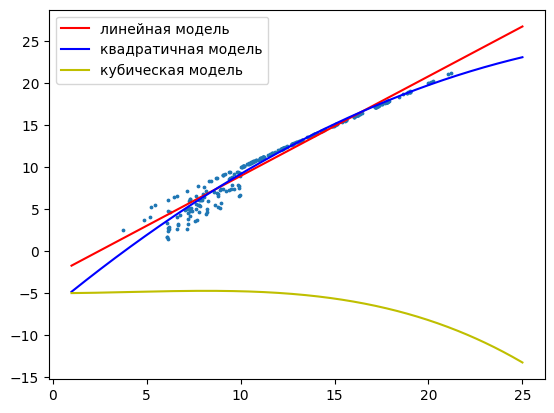

In [12]:
gr_quadratic = gr_x * model_quadratic.params['x'] + model_quadratic.params['Intercept'] + gr_x ** 2 * \
               model_quadratic.params['I(x ** 2)']
gr_cubic = model_cubic.params['Intercept'] + gr_x ** 2 * model_cubic.params['I(x ** 2)'] + gr_x ** 3 * \
           model_cubic.params['I(x ** 3)']

plt.scatter(x_values, y_values, s=3)
plt.plot(gr_x, gr_y, color='r', label='линейная модель')
plt.plot(gr_x, gr_quadratic, color='b', label='квадратичная модель')
plt.plot(gr_x, gr_cubic, color='y', label='кубическая модель')

plt.legend()
plt.show()

j-тест Стьюдента показал, что обе нелинейные модели можно заменить линейными, поэтому в дальнейшем продолжим работать именно с линейными моделями

## Задание 7

Вывод: действительно, между величинами наблюдается очень сильная линейная связь, однако присутствие автокорреляции и гетероскедастичности скорее всего говорят о необходимости перехода к многофакторным моделям для получения более точной аппроксимации